In [7]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import os
import random
import math
import pandas as pd
import scipy
import numpy.ma as ma
import itertools
import community
# from infomap import infomap
import os
import rpy2.robjects as robjects

In [8]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [9]:
dol_gml = nx.read_gml('dolphins.gml')
dol_txt = ldata ('dolphins.txt')
dol_gen = ldata ('dolphinsGender.txt')

In [10]:
for d in dol_gen:
    dol_gml.nodes[d[0]]["genero"]=d[1]

In [22]:
def silhouette1(g,dic):
    a = []
    b = []
    S = []
    sil ={}
    for node in g.nodes:
        dist_b = []
        dist_a = []
        minn = min(list(dic.values()))
        maxx = max(list(dic.values()))

        for i in range(minn,maxx+1):
            dist_b.append([])

        for vecino,atri in dic.items():
            if atri == dic[node] and node != vecino and vecino in nx.node_connected_component(g,node):
                dist_a.append(nx.shortest_path_length(g, source=node, target=vecino, weight=None))

            elif node != vecino and vecino in nx.node_connected_component(g,node):
                dist_b[atri-minn].append(nx.shortest_path_length(g, source=node, target=vecino, weight=None))

        dist_b.remove(dist_b[dic[node]-minn])
        
        if len(dist_a) == 0:
                a_prom = 0
        else:
            a_prom = sum(dist_a)/len(dist_a)

        a.append(a_prom)

        b_prom = []
        for i in range(len(dist_b)):
            b_prom.append(sum(dist_b[i])/len(dist_b[i]))

        b.append(min(b_prom))
        
        sil[node]=(min(b_prom)-a_prom)/max(min(b_prom),a_prom) #diccionario

        S.append([node,(min(b_prom)-a_prom)/max(min(b_prom),a_prom)])
     

    Sprom = 0
    for i in range(len(S)):
        Sprom = Sprom + S[i][1]/len(S)

    return sil,Sprom

In [12]:
def grafico_sil(g,dic,silhouette,u):
    
    label = ['Louvain','Fast Greedy','Betweenness','Infomap']
    
    sil,S = silhouette(g,dic)
#     print(type(sil))
    valores = []

    for i in range(min(list(dic.values())),max(list(dic.values()))+1):
        valores2=[]
        for node in g.nodes:
#             print(sil[node])
            if dic[node] == i:
                valores2.append([node,sil[node]])
        valores2.sort(key=lambda cluster: cluster[1], reverse=True)
        valores.append(valores2)
    
    xdata=[]
    ydata=[]
    xo=0
    w=1
    for i in range(len(valores)):
        x=np.zeros(len(valores[i])+1)
        y=np.zeros(len(valores[i])+1)
        t=-1
        x[0]=xo
        
        for j in range(len(valores[i])):
#             l=l+1
#             S=S+valores[i][j][1]
            x[j+1]=x[j]+1
            y[j]=y[j]+valores[i][j][1]
        x[len(valores[i])]=x[len(valores[i])-1]+1
        xo=x[len(valores[i])]+1
        xdata.append(x)
        ydata.append(y)
        
#     S=S/l
#     print(xdata)
    for i in range(len(valores)):
        plt.bar(xdata[i],ydata[i], width=w, bottom=None)
    plt.axhline(y=S,linewidth=1, color='r', linestyle='dashed',label=round(S,4))
    plt.legend()
    plt.title(label[u]+'- Silhouette')
    plt.savefig ("Silhouette_"+label[u]+".png")
    plt.show()

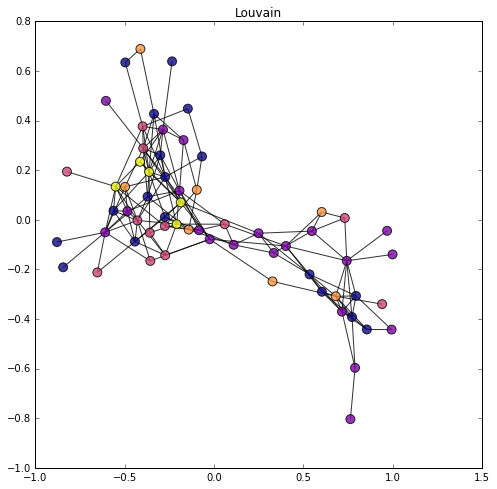

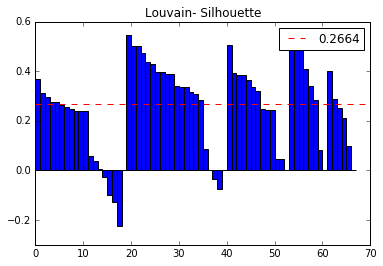

In [13]:
louvian = community.best_partition(dol_gml)
lou_mod = community.modularity(louvian,dol_gml)
d,lou_sil = silhouette1(dol_gml,louvian)

plt.figure(figsize=(8,8))
for name,label in louvian.items():
    dol_gml.nodes()[name]["color"] = label

nx.draw_networkx(dol_gml, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.title('Louvain')
plt.savefig ("Particion_Louvain.png")
plt.show()

grafico_sil(dol_gml,louvian,silhouette1,0)

0.13795463279675554


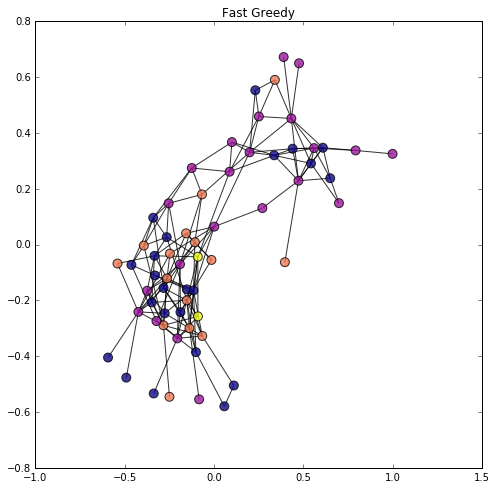

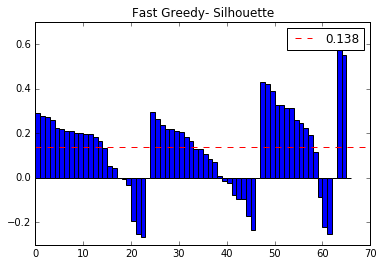

In [14]:
fast_greedy = nx.algorithms.community.greedy_modularity_communities(dol_gml)
fast_greedy_dict = {}
for i in range(len(fast_greedy)):
    for node in fast_greedy[i]:
        fast_greedy_dict[node] = i
fast_greedy_mod = community.modularity(fast_greedy_dict,dol_gml)
d,fast_greedy_sil = silhouette1(dol_gml,fast_greedy_dict)
print(fast_greedy_sil)
plt.figure(figsize=(8,8))
for name,label in fast_greedy_dict.items():
    dol_gml.nodes()[name]["color"] = label

nx.draw_networkx(dol_gml, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.title('Fast Greedy')
plt.savefig ("Particion_FatsGreedy.png")
plt.show()                               
grafico_sil(dol_gml,fast_greedy_dict,silhouette1,1) 

[({'TSN83', 'Vau', 'Bumper', 'MN60', 'Zipfel', 'SN96', 'Hook', 'Stripes', 'Cross', 'SN63', 'SMN5', 'MN105', 'Grin', 'TR77', 'Zap', 'Patchback', 'Kringel', 'SN4', 'PL', 'SN9', 'SN100', 'Oscar', 'Jonah', 'Fish', 'TR120', 'Shmuddel', 'TSN103', 'MN83', 'Thumper', 'TR99', 'Scabs', 'Beak', 'CCL', 'TR88', 'Whitetip', 'Haecksel', 'Five', 'Double', 'Fork', 'Trigger', 'Topless'}, {'Knit', 'DN16', 'Wave', 'Notch', 'Ripplefluke', 'Web', 'Gallatin', 'Zig', 'MN23', 'Jet', 'TR82', 'SN90', 'Quasi', 'Beescratch', 'DN63', 'SN89', 'Number1', 'Upbang', 'Feather', 'Mus', 'DN21'}), ({'TSN83', 'Zipfel'}, {'Knit', 'DN16', 'Wave', 'Notch', 'Ripplefluke', 'Web', 'Gallatin', 'Zig', 'MN23', 'Jet', 'TR82', 'SN90', 'Quasi', 'Beescratch', 'DN63', 'SN89', 'Number1', 'Upbang', 'Feather', 'Mus', 'DN21'}, {'Vau', 'Bumper', 'MN60', 'SN96', 'Hook', 'Stripes', 'Cross', 'SN63', 'SMN5', 'MN105', 'Grin', 'TR77', 'Zap', 'Patchback', 'Kringel', 'SN4', 'PL', 'SN9', 'SN100', 'Oscar', 'Jonah', 'Fish', 'TR120', 'Shmuddel', 'TSN103'

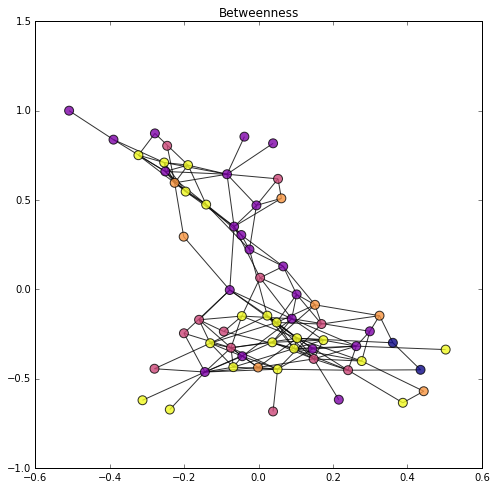

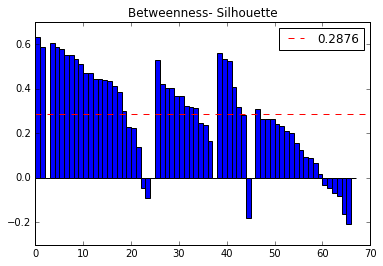

In [21]:
betweenness = nx.algorithms.community.centrality.girvan_newman(dol_gml)
a = [node for node in betweenness]
print(a)
r=len(a) #r es el numero de diccionarios que tengo, por cada diccionario tengo x comunidades (mientras mas grande r, mas grande x)
diccionarios_bet=[]
for j in range(len(a)):
    betweenness_dict = {}
    for i in range(len(a[j])):
        for node in dol_gml.nodes:
            if node in a[j][i]:
                betweenness_dict[node] = i
    diccionarios_bet.append(betweenness_dict)

t=10 #numero de particiones que quiero analizar
bet_mod = [] #Creo una lista que contenga a la modularidad correspondiente a cada t
for i in range(t):
    mod = community.modularity(diccionarios_bet[i],dol_gml)
    bet_mod.append(mod)

ind = bet_mod.index(max(bet_mod))
bet_max_mod = diccionarios_bet[ind]
bet_mod = max(bet_mod)
plt.figure(figsize=(8,8))
for name,label in bet_max_mod.items():
    dol_gml.nodes()[name]["color"] = label

nx.draw_networkx(dol_gml, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.title('Betweenness')
plt.savefig ("Particion_Betweenness.png")
plt.show()     

d, bet_sil = silhouette1(dol_gml,bet_max_mod)
grafico_sil(dol_gml,bet_max_mod,silhouette1,2) 

In [16]:
def clusterize(nxG, algorithm, fig_name = "G"):
    """
    In:
        nxG: grafo de networkx.
        algorithm: string, entre las siguientes opciones: 
            fast_greedy
            edge_betweenness
            louvain
            infomap
        fig_name: nombre de la figura que se genera al clsuterizar. Le agrega automaticamente el nombre del algoritmo usado y el nombre del grafo si lo tuviere
    Out:
        labels: numpy array con la pertenencia de cada nodo al cluster.
    
    """
    gml_file_name = "G.gml"
    fig_name += "_"+nxG.name+"_"+algorithm+".svg"
    nx.write_gml(nxG, gml_file_name)
    
    igG = robjects.r('''
        f <- function(file, algorithm, fig_name, v_names){
            require("igraph")     
            
            G <- read.graph(file, "gml")
            V(G)$name <- as.character(unlist(v_names))
            #format = c("edgelist", "pajek", "ncol", "lgl", "graphml","dimacs", "graphdb", "gml", "dl"), ...)
            
            if(algorithm == "fast_greedy"){
                c <- fastgreedy.community(G)
                #c <- cluster_fast_greedy(G, merges = TRUE, modularity = TRUE, membership = TRUE)
            }
            
            if(algorithm == "edge_betweenness"){
                c <- edge.betweenness.community(G)
                #c <- cluster_edge_betweenness(G,directed = FALSE,edge.betweenness = TRUE)
            }
            
            if(algorithm == "louvain"){
                c <- multilevel.community(G)
                #c <- cluster_louvain(G)
            }
            
            if(algorithm == "infomap"){
                #c <- cluster_infomap(G)
                c <- infomap.community(G)
            }
            
            svg(fig_name)
            plot(c, G)
            dev.off()
            
            return(list(membership(c), as.character(V(G)$name)))
        }
    ''')
    
    labels = igG(gml_file_name, algorithm, fig_name, list(dict(nxG.nodes(data=True)).keys()))
    os.remove(gml_file_name)
    return {name: int(label) for name, label in zip(labels[1],labels[0])}


In [18]:
infomap = clusterize(dol_gml, 'infomap', fig_name = "G")

/home/facem/.local/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: igraph

  warnings.warn(x, RRuntimeWarning)


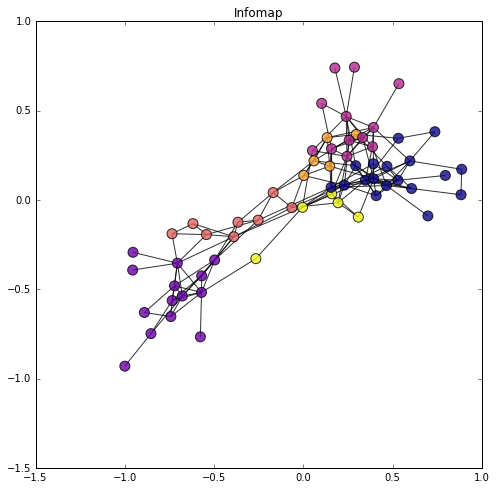

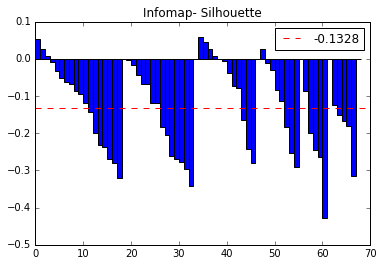

In [19]:
# infomap = {'Beak': 3,
#  'Beescratch': 0,
#  'Bumper': 3,
#  'CCL': 4,
#  'Cross': 2,
#  'DN16': 0,
#  'DN21': 0,
#  'DN63': 0,
#  'Double': 4,
#  'Feather': 0,
#  'Fish': 3,
#  'Five': 2,
#  'Fork': 1,
#  'Gallatin': 0,
#  'Grin': 1,
#  'Haecksel': 2,
#  'Hook': 1,
#  'Jet': 0,
#  'Jonah': 2,
#  'Knit': 0,
#  'Kringel': 1,
#  'MN105': 2,
#  'MN23': 0,
#  'MN60': 2,
#  'MN83': 2,
#  'Mus': 0,
#  'Notch': 0,
#  'Number1': 0,
#  'Oscar': 3,
#  'PL': 3,
#  'Patchback': 2,
#  'Quasi': 0,
#  'Ripplefluke': 0,
#  'SMN5': 2,
#  'SN100': 4,
#  'SN4': 1,
#  'SN63': 1,
#  'SN89': 4,
#  'SN9': 1,
#  'SN90': 0,
#  'SN96': 3,
#  'Scabs': 1,
#  'Shmuddel': 1,
#  'Stripes': 1,
#  'TR120': 1,
#  'TR77': 3,
#  'TR82': 0,
#  'TR88': 1,
#  'TR99': 1,
#  'TSN103': 1,
#  'TSN83': 1,
#  'Thumper': 1,
#  'Topless': 2,
#  'Trigger': 2,
#  'Upbang': 0,
#  'Vau': 2,
#  'Wave': 0,
#  'Web': 0,
#  'Whitetip': 1,
#  'Zap': 4,
#  'Zig': 0,
#  'Zipfel': 1}

infomap_mod = community.modularity(infomap,dol_gml)
d,infomap_sil = silhouette1(dol_gml,infomap)

plt.figure(figsize=(15,15))
for name,label in infomap.items():
    dol_gml.nodes()[name]["color"] = label
# colores=[]
# for node in dol_gml.nodes:
#     colores.append(infomap[node])
# print(colores)
# print(list(dol_gml.nodes()))
# print(list(nx.get_node_attributes(dol_gml, "color").values()))
# print(infomap)
plt.figure(figsize=(8,8))
nx.draw_networkx(dol_gml,pos=nx.spring_layout(dol_gml), cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=100,
                 alpha=0.8,
                 with_labels=False)
plt.title('Infomap')
plt.savefig ("Particion_Infomap.png")
plt.show()                               
grafico_sil(dol_gml,infomap,silhouette1,3)

### Comparo los valores obtenidos con la distribucion de modularidad y silhouette en redes recableadas aleatoreamente con misma distribución de grado

In [44]:
def recableado(g,nro_de_veces,u,modREAL,silREAL):
    
    mod = []
    sil = []
    label = ['Louvain','Fast Greedy','Betweenness','Infomap']
#---------------------------------------------------------------------------------------------------
    if u==0:
        #LOUVAIN
        for _ in range(nro_de_veces):

            r = nx.double_edge_swap(g, nswap=200, max_tries=500)
            giant = max(nx.connected_component_subgraphs(r), key=len)
            if len(giant.nodes())==62:

                diclou = community.best_partition(r)
                lou_mod = community.modularity(louvian,r)
                mod.append(lou_mod)

                ds,SL = silhouette1(r,diclou)
                sil.append(SL)
            
    if u==1:
        #FAST GREEDY
        for _ in range(nro_de_veces):
            
            r = nx.double_edge_swap(g, nswap=200, max_tries=500)
            
            giant = max(nx.connected_component_subgraphs(r), key=len)
            if len(giant.nodes())==62:
        
                fg = nx.algorithms.community.greedy_modularity_communities(r)
                dicfg = {}
                for i in range(len(fg)):
                    for node in fg[i]:
                        dicfg[node] = i
                fg_mod = community.modularity(dicfg,r)

                dfg,SL = silhouette1(r,dicfg)
                mod.append(fg_mod)
                sil.append(SL)

    if u==2:
        #BETWEENNESS
        for _ in range(nro_de_veces):

            r = nx.double_edge_swap(g, nswap=200, max_tries=500)
#             nx.draw_networkx(r, cmap=plt.get_cmap('plasma'),
#                  node_size=50,
#                  alpha=0.8,
#                  with_labels=False)
            giant = max(nx.connected_component_subgraphs(r), key=len)
            if len(giant.nodes())==62:
                
                bet = nx.algorithms.community.centrality.girvan_newman(r)
                e = [node for node in bet]
#                 print(e)
                t=len(e) #r es el numero de diccionarios que tengo, por cada diccionario tengo x comunidades (mientras mas grande r, mas grande x)
#                 print(len(e))
                dicsbetlist=[]
                for j in range(t):
                    dicsbet = {}
                    for i in range(len(e[j])):
                        for node in r.nodes:
                            if node in e[j][i]:
                                dicsbet[node] = i
                    dicsbetlist.append(dicsbet)
#                 print(dicsbetlist)
#                 t=len(e) #numero de particiones que quiero analizar
                lista_bet_mod = [] #Creo una lista que contenga a la modularidad correspondiente a cada t
                for i in range(len(dicsbetlist)):
                    bettmod = community.modularity(dicsbetlist[i],giant)
                    lista_bet_mod.append(bettmod)
#                 print(lista_bet_mod)
                ind = lista_bet_mod.index(max(lista_bet_mod))
#                 print(ind)
                bet_modd = max(lista_bet_mod)
                dicbet = diccionarios_bet[ind] #me quedo con el de maxima modularidad
#                 print(dicbet)
#                 bet_modd = community.modularity(dicbet,giant)
                mod.append(bet_modd)

                ds,SL = silhouette1(r,dicbet)
                sil.append(SL)
            
    if u==3:
#        INFOMAP
        for _ in range(nro_de_veces):

            r = nx.double_edge_swap(g, nswap=200, max_tries=500)
            dicinfomap = clusterize(r, 'infomap', fig_name = "G")
            info_mod = community.modularity(dicinfomap,r)
            mod.append(info_mod)
            
            ds,SL = silhouette1(r,dicinfomap)
            lou.append(SL)
#---------------------------------------------------------------------------------------------------
        
    mod_array = np.asarray(mod)
    sil_array = np.asarray(sil)
    
    prom_mod = sum(mod)/len(mod)
    prom_sil = sum(sil)/len(sil)
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.hist (mod_array)
    plt.title(label[u]+"- Distribución de Modularidad")
    plt.xlabel('Modularidad')
    plt.axvline(x=prom_mod, linewidth=1, color='k', linestyle='dashed',label='Modularidad promedio='+str(round(prom_mod,4)))
    plt.axvline(x=modREAL, linewidth=1, color='r', linestyle='dashed',label='Real='+str(round(modREAL,4)))
#     plt.ylabel ("Distribución")
    plt.title (label[u])
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.hist (sil_array)
    plt.title(label[u]+"- Distribución de Silhouette")
    plt.xlabel('Silhouette')
    plt.axvline(x=prom_sil, linewidth=1, color='k', linestyle='dashed',label='Silhouette promedio='+str(round(prom_sil,4)))
    plt.axvline(x=silREAL, linewidth=1, color='r', linestyle='dashed',label='Real='+str(round(silREAL,4)))
#     plt.ylabel ("Distribución")
    plt.title (label[u])
    plt.legend()
    
    plt.savefig('modularidad_silhouette_'+label[u]+'.png')
    plt.show()
    
    dol_gml = nx.read_gml('dolphins.gml')
    for d in dol_gen:
        dol_gml.nodes[d[0]]["genero"]=d[1]

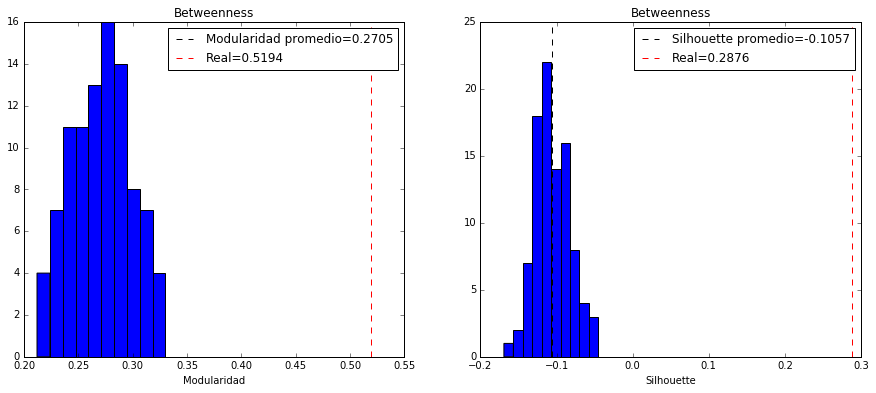

In [45]:
# lou_mod lou_sil fast_greedy_mod fast_greedy_sil bet_sil bet_mod infomap_mod infomap_sil

recableado(dol_gml,100,2,bet_mod,bet_sil)

In [31]:
dol_gml = nx.read_gml('dolphins.gml')
for d in dol_gen:
    dol_gml.nodes[d[0]]["genero"]=d[1]

In [18]:
dddd={'Quasi': 0, 'MN83': 1, 'MN105': 1, 'Beescratch': 6, 'Vau': 4, 'Shmuddel': 5, 'Number1': 6, 'TR99': 5, 'TR82': 8, 'MN23': 0, 'SN9': 5, 'SN100': 9, 'Double': 2, 'Jet': 0, 'Scabs': 5, 'Fish': 7, 'TR77': 7, 'SMN5': 10, 'SN4': 5, 'Grin': 5, 'Haecksel': 1, 'Knit': 3, 'Upbang': 12, 'Zig': 14, 'Gallatin': 12, 'Notch': 6, 'Fork': 13, 'DN21': 12, 'SN63': 5, 'SN90': 12, 'TSN103': 15, 'Five': 16, 'Trigger': 1, 'CCL': 2, 'DN63': 3, 'TSN83': 17, 'Ripplefluke': 14, 'Stripes': 5, 'Feather': 12, 'TR120': 18, 'Oscar': 21, 'SN96': 7, 'TR88': 18, 'Thumper': 19, 'Beak': 7, 'SN89': 20, 'Web': 12, 'Jonah': 1, 'Cross': 11, 'Kringel': 5, 'Wave': 22, 'Mus': 6, 'Zap': 2, 'Whitetip': 23, 'Bumper': 7, 'Zipfel': 17, 'Topless': 1, 'MN60': 24, 'PL': 21, 'Patchback': 1, 'Hook': 5, 'DN16': 12}

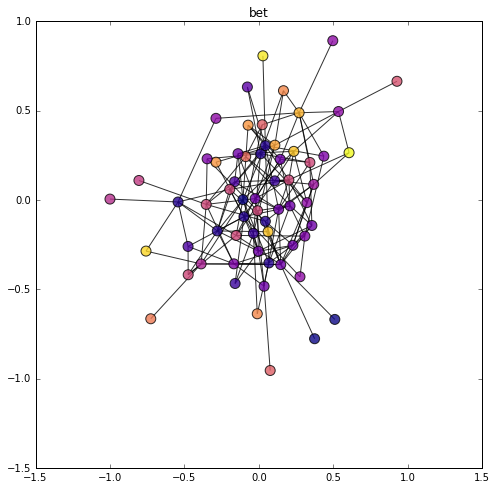

In [19]:
plt.figure(figsize=(15,15))
for name,label in dddd.items():
    dol_gml.nodes()[name]["color"] = label
# colores=[]
# for node in dol_gml.nodes:
#     colores.append(infomap[node])
# print(colores)
# print(list(dol_gml.nodes()))
# print(list(nx.get_node_attributes(dol_gml, "color").values()))
# print(infomap)
plt.figure(figsize=(8,8))
nx.draw_networkx(dol_gml, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(dol_gml, "color").values()),
                 node_size=100,
                 alpha=0.8,
                 with_labels=False)
plt.title('bet')
# plt.savefig ("Particion_Infomap.png")
plt.show()                               